In [78]:
import pickle

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pyvis

import networkx as nx
from pyvis.network import Network

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Loading data

In [2]:
single_experience_nodes_by_month_and_no_job_periods_df = pd.read_parquet("../data/processed/single_experience_nodes_by_month_and_no_job_periods.parquet")
print(f"Shape: {single_experience_nodes_by_month_and_no_job_periods_df.shape}")
single_experience_nodes_by_month_and_no_job_periods_df

Shape: (817075, 6)


,date,person_id,company_id,start_date,end_date,model_classification
0,2010-01-01,0.0,2.0,2010-01-01,2024-05-01,030000
1,2010-01-01,0.0,3.0,2010-01-01,2017-01-01,192041
2,2010-02-01,0.0,2.0,2010-01-01,2024-05-01,030000
3,2010-02-01,0.0,3.0,2010-01-01,2017-01-01,192041
4,2010-03-01,0.0,2.0,2010-01-01,2024-05-01,030000
...,...,...,...,...,...,...
19,2024-01-01,9245.0,652.0,2024-01-01,2024-05-01,132051
20,2024-02-01,9245.0,652.0,2024-01-01,2024-05-01,132051
21,2024-03-01,9245.0,652.0,2024-01-01,2024-05-01,132051
22,2024-04-01,9245.0,652.0,2024-01-01,2024-05-01,132051


In [11]:
with open(r"gf_temporal_single_experience_nodes_untraceable.pkl", "rb") as input_file:
    gf_temporal_single_experience_nodes_untraceable = pickle.load(input_file)

print("Number of nodes:", gf_temporal_single_experience_nodes_untraceable.number_of_nodes())
print("Number of edges:", gf_temporal_single_experience_nodes_untraceable.number_of_edges())

Number of nodes: 11574
Number of edges: 20715


In [12]:
with open("gf_temporal_single_experience_nodes_traceable.pkl", "rb") as input_file:
    gf_temporal_single_experience_nodes_traceable = pickle.load(input_file)

print("Number of nodes:", gf_temporal_single_experience_nodes_traceable.number_of_nodes())
print("Number of edges:", gf_temporal_single_experience_nodes_traceable.number_of_edges())

Number of nodes: 22569
Number of edges: 38240


In [13]:
with open("gf_FILTERED_single_experience_nodes_traceable.pkl", "rb") as input_file:
    gf_filtered_temporal_single_experience_nodes_traceable = pickle.load(input_file)

print("Number of nodes:", gf_filtered_temporal_single_experience_nodes_traceable.number_of_nodes())
print("Number of edges:", gf_filtered_temporal_single_experience_nodes_traceable.number_of_edges())

Number of nodes: 201
Number of edges: 176


In [24]:
nx.betweenness_centrality(gf_temporal_single_experience_nodes_traceable)

{'030000 - 2010-01-01': 0.005884634819593523,
 '030000 - 2010-02-01': 0.00589894291632143,
 '192041 - 2010-02-01': 0.0009326367564480768,
 '192041 - 2010-01-01': 0.0009184327257455039,
 '030000 - 2010-03-01': 0.0023532224886208242,
 '192041 - 2010-03-01': 0.0009468368601308289,
 '030000 - 2010-04-01': 0.00236735779647648,
 '192041 - 2010-04-01': 0.000961033036793751,
 '030000 - 2010-05-01': 0.0006533945802573033,
 '192041 - 2010-05-01': 6.193674497006431e-05,
 '030000 - 2010-06-01': 0.000667329610101945,
 '192041 - 2010-06-01': 7.554386865942882e-05,
 '030000 - 2010-07-01': 0.0014786517325439197,
 '192041 - 2010-07-01': 8.914706532896433e-05,
 '030000 - 2010-08-01': 0.012196751693701009,
 '192041 - 2010-08-01': 0.00041330494398123863,
 '030000 - 2010-09-01': 0.026093820200766178,
 '192041 - 2010-09-01': 0.00042627785396906254,
 '030000 - 2010-10-01': 0.006269202209887947,
 '192041 - 2010-10-01': 4.9499798172495276e-05,
 '030000 - 2010-11-01': 0.0018231787364584593,
 '192041 - 2010-11-0

# Answering questions (from the whole graph)

## Which job is the most common?

In [14]:
# The one that appeared most overall
single_experience_nodes_by_month_and_no_job_periods_df['model_classification'].value_counts().head(10)

model_classification
000000               146342
no job registered     84013
131111                77639
151211                50427
030000                49075
152051                43875
132051                39154
419099                24938
151252                24819
436014                19206
Name: count, dtype: int64

In [15]:
# The one that appeared most in a single month
grouped_df_counts = single_experience_nodes_by_month_and_no_job_periods_df[['date', 'model_classification']].groupby(by=['date', 'model_classification']).size().reset_index(name='counts')
grouped_df_counts = grouped_df_counts.groupby(by='model_classification').max().reset_index()
grouped_df_counts.sort_values(by='counts', ascending=False).head(10)

,model_classification,date,counts
0,000000,2024-05-01,1590
23,131111,2024-05-01,1021
129,no job registered,2024-04-01,857
44,152051,2024-05-01,772
35,151211,2024-05-01,761
31,132051,2024-05-01,571
2,030000,2024-05-01,429
39,151252,2024-05-01,428
98,419099,2024-05-01,325
27,131161,2024-05-01,211


In [16]:
# The one with the largest amount of different people over all months (meaning: a lot of different people at least tried this job)

grouped_df_counts = single_experience_nodes_by_month_and_no_job_periods_df.groupby(['model_classification'])['person_id'].nunique().reset_index()
grouped_df_counts.columns = ['model_classification', 'unique_people_count'] 
grouped_df_counts = grouped_df_counts.sort_values(by='unique_people_count', ascending=False).reset_index(drop=True)
grouped_df_counts.head(20)

,model_classification,unique_people_count
0,no job registered,4091
1,000000,3905
2,131111,2648
3,151211,1709
4,152051,1466
5,132051,1254
6,419099,943
7,030000,802
8,436014,665
9,151252,657


## Which job gets the most new entrants? And the most departing people?

In [17]:
# Method to calculate weight changes with a given time window
def calculate_weight_changes_with_window(nodes, months_window):
    weight_changes = []
    for i in range(len(nodes)):
        current_node = nodes[i]
        current_occupation = current_node[1]['occupation']
        current_date = datetime.strptime(current_node[1]['date'], '%Y-%m-%d')
        
        # Find the comparison date
        comparison_date = current_date + relativedelta(months=months_window)
        comparison_node = None
        
        # Search for the node with the comparison date
        for j in range(i+1, len(nodes)):
            next_node = nodes[j]
            next_date = datetime.strptime(next_node[1]['date'], '%Y-%m-%d')
            if next_node[1]['occupation'] == current_occupation and next_date == comparison_date:
                comparison_node = next_node
                break
        
        # If a comparison node is found, calculate the weight change
        if comparison_node:
            weight_change = comparison_node[1]['weight'] - current_node[1]['weight']
            weight_changes.append((current_occupation, current_node[1]['date'], comparison_node[1]['date'], weight_change))
    
    # Sort weight changes by absolute value in descending order
    weight_changes.sort(key=lambda x: abs(x[3]), reverse=True)
    
    return weight_changes

def print_top_weight_changes(weight_changes, occupation_to_exclude, N, change_type):
    """
    Print the top N weight changes, excluding the given occupation of interest.

    Parameters:
    - weight_changes: list of tuples (occupation, start_date, end_date, change)
    - occupation_to_exclude: the occupation to exclude from the results
    - N: number of top results to print
    - change_type: string indicating the type of change ('Positive' or 'Negative')
    """
    filtered_changes = [change for change in weight_changes if change[0] != occupation_to_exclude]
    top_changes = filtered_changes[:N]

    print(f"\n{change_type} Weight Changes (excluding '{occupation_to_exclude}'):")
    for occupation, start_date, end_date, change in top_changes:
        direction = 'increased' if change_type == 'Positive' else 'decreased'
        print(f"{occupation} - from {start_date} to {end_date} {direction} by {change} units")

In [18]:
#### Time window parameter
months_window = 6

nodes_list = list(gf_temporal_single_experience_nodes_traceable.nodes(data=True))
nodes_list.sort(key=lambda x: (x[1]['occupation'], datetime.strptime(x[1]['date'], '%Y-%m-%d')))
weight_changes_with_window = calculate_weight_changes_with_window(nodes_list, months_window)

# Separate into positive and negative weight changes
positive_weight_changes = [change for change in weight_changes_with_window if change[3] > 0]
negative_weight_changes = [change for change in weight_changes_with_window if change[3] < 0]

In [19]:
#### Parameters to print
N = 30
occupation_to_exclude = None
# Most new entrants
print_top_weight_changes(positive_weight_changes, occupation_to_exclude, N, 'Positive')


Positive Weight Changes (excluding 'None'):
000000 - from 2019-01-01 to 2019-07-01 increased by 199 units
000000 - from 2019-02-01 to 2019-08-01 increased by 163 units
000000 - from 2018-12-01 to 2019-06-01 increased by 162 units
000000 - from 2017-02-01 to 2017-08-01 increased by 144 units
000000 - from 2018-02-01 to 2018-08-01 increased by 142 units
no job registered - from 2019-11-01 to 2020-05-01 increased by 134 units
000000 - from 2017-04-01 to 2017-10-01 increased by 133 units
000000 - from 2017-03-01 to 2017-09-01 increased by 131 units
000000 - from 2018-05-01 to 2018-11-01 increased by 130 units
000000 - from 2018-04-01 to 2018-10-01 increased by 129 units
000000 - from 2017-01-01 to 2017-07-01 increased by 128 units
151211 - from 2021-04-01 to 2021-10-01 increased by 127 units
000000 - from 2016-12-01 to 2017-06-01 increased by 126 units
000000 - from 2018-03-01 to 2018-09-01 increased by 125 units
000000 - from 2019-03-01 to 2019-09-01 increased by 124 units
no job registe

In [27]:
# Most departing
# Print top N negative weight changes, excluding the given occupation of interest
occupation_to_exclude = 'no job registered'
print_top_weight_changes(negative_weight_changes, occupation_to_exclude, 100, 'Negative')


Negative Weight Changes (excluding 'no job registered'):
000000 - from 2021-07-01 to 2022-01-01 decreased by -74 units
131111 - from 2022-11-01 to 2023-05-01 decreased by -71 units
000000 - from 2022-09-01 to 2023-03-01 decreased by -66 units
000000 - from 2021-08-01 to 2022-02-01 decreased by -63 units
131111 - from 2022-10-01 to 2023-04-01 decreased by -62 units
000000 - from 2021-09-01 to 2022-03-01 decreased by -60 units
000000 - from 2022-10-01 to 2023-04-01 decreased by -60 units
000000 - from 2022-08-01 to 2023-02-01 decreased by -59 units
000000 - from 2022-11-01 to 2023-05-01 decreased by -57 units
131111 - from 2022-08-01 to 2023-02-01 decreased by -56 units
131111 - from 2022-12-01 to 2023-06-01 decreased by -52 units
000000 - from 2022-12-01 to 2023-06-01 decreased by -50 units
000000 - from 2019-11-01 to 2020-05-01 decreased by -49 units
131111 - from 2023-03-01 to 2023-09-01 decreased by -48 units
000000 - from 2021-10-01 to 2022-04-01 decreased by -47 units
000000 - fro

In [21]:
# The ones with the highest in-degree coming from a different job occupation than itself, counting only one time per person_id

def calculate_new_entrants_in_degrees(graph):
    new_entrants_in_degrees = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
    for node, node_attrs in graph.nodes(data=True):
        # print(f"node: {node}")
        current_occupation = node_attrs['occupation']
        current_date = datetime.strptime(node_attrs['date'], "%Y-%m-%d").date()
        if node.startswith("no job registered"):
            continue
        
        incoming_person_ids = set()
        for pred in graph.predecessors(node):
            pred_attrs = graph.nodes[pred]
            prev_occupation = pred_attrs['occupation']
            # print(f"\n\tgraph.get_edge_data(pred, node): {graph.get_edge_data(pred, node)}\n")
            for edge_key in graph.get_edge_data(pred, node):
                edge_data = graph.get_edge_data(pred, node, edge_key)
                if current_occupation != prev_occupation:
                    person_id = edge_data['person_id']
                    if person_id is not None:
                        incoming_person_ids.add(person_id)
        new_entrants_in_degrees[current_date][current_occupation]['new_entrants_in_degree'] = len(incoming_person_ids)
        new_entrants_in_degrees[current_date][current_occupation]['incoming_person_ids'] = incoming_person_ids
    return new_entrants_in_degrees

# Calculate the custom in-degrees for all nodes
new_entrants_in_degrees = calculate_new_entrants_in_degrees(gf_temporal_single_experience_nodes_traceable)

# Flatten the structure into a list of tuples for easy sorting
flattened_new_entrants_in_degrees = []
for date, occupations in new_entrants_in_degrees.items():
    for occupation, values in occupations.items():
        new_entrants_in_degree = values.get('new_entrants_in_degree', 0)
        flattened_new_entrants_in_degrees.append((date, occupation, new_entrants_in_degree))

top_new_entrants_in_degrees = sorted(flattened_new_entrants_in_degrees, key=lambda x: x[2], reverse=True)

# Display the results with aligned columns
header = f"{'Node':<40}{'Date':<12}{'New entrants in degree':<10}"
print(header)
print("-" * len(header))

for entry in top_new_entrants_in_degrees[:10]:
    node = entry[1]
    date_str = entry[0].strftime('%Y-%m-%d')
    new_entrants_in_degree = entry[2]
    print(f"{node:<40}{date_str:<12}{new_entrants_in_degree:<10}")

Node                                    Date        New entrants in degree
--------------------------------------------------------------------------
000000                                  2022-05-01  23        
000000                                  2022-06-01  22        
151211                                  2021-10-01  21        
131111                                  2022-02-01  21        
131111                                  2021-06-01  20        
131111                                  2021-07-01  20        
000000                                  2022-01-01  20        
131111                                  2022-03-01  20        
000000                                  2022-10-01  20        
000000                                  2020-08-01  19        


In [29]:
import networkx as nx
from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_increases(graph, months_window, occupation_of_interest="no job registered"):
    increases = []
    nodes = list(graph.nodes(data=True))
    nodes.sort(key=lambda x: datetime.strptime(x[1]['date'], '%Y-%m-%d'))  # Ensure nodes are sorted by date

    for i in range(len(nodes)):
        current_node = nodes[i]
        if current_node[1]['occupation'] == occupation_of_interest:
            current_date = datetime.strptime(current_node[1]['date'], '%Y-%m-%d')
            
            # Find the comparison date
            comparison_date = current_date + relativedelta(months=months_window)
            comparison_node = None
            
            # Search for the node with the comparison date
            for j in range(i+1, len(nodes)):
                next_node = nodes[j]
                next_date = datetime.strptime(next_node[1]['date'], '%Y-%m-%d')
                if next_node[1]['occupation'] == occupation_of_interest and next_date == comparison_date:
                    comparison_node = next_node
                    break
            
            # If a comparison node is found, calculate the increase
            if comparison_node:
                increase = comparison_node[1]['weight'] - current_node[1]['weight']
                increases.append((current_date, comparison_date, increase))
    
    # Sort increases by the value in descending order
    increases.sort(key=lambda x: x[2], reverse=True)
    
    return increases

def print_top_increases(increases, N):
    print("\nTop Increases for 'no job registered':")
    top_increases = increases[:N]
    for start_date, end_date, increase in top_increases:
        print(f"From {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')} increased by {increase} units")

# Calculate increases for a 6-month window
increases = calculate_increases(gf_temporal_single_experience_nodes_traceable, 6)

# Print the top 6 increases
print_top_increases(increases, 6)


Top Increases for 'no job registered':
From 2019-11-01 to 2020-05-01 increased by 134 units
From 2015-07-01 to 2016-01-01 increased by 123 units
From 2015-08-01 to 2016-02-01 increased by 122 units
From 2019-12-01 to 2020-06-01 increased by 117 units
From 2015-06-01 to 2015-12-01 increased by 101 units
From 2014-08-01 to 2015-02-01 increased by 100 units


## Which jobs are people leaving the most?

In [22]:
# I need to take into account the probation period of 3 months -> it's already taken into consideration using the following logic:

# Departing people are:
# The ones where the person moved from job X to Y in t0->t1, but they didn't mantained their previous job X
# The ones where the person left job X at t0 while having another job Y (therefore leaving job X didn't create the vertex from X to "no job registered", since they had job Y)


def calculate_dropout_out_degrees(graph):
    dropout_out_degrees = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
    for node, node_attrs in graph.nodes(data=True):
        current_occupation = node_attrs['occupation']
        current_date = datetime.strptime(node_attrs['date'], "%Y-%m-%d").date()
        if node.startswith("no job registered"):
            continue
        
        departing_person_ids_to_different_occupation = set()
        departing_person_ids_to_same_occupation = set()
        for succ in graph.successors(node):
            succ_attrs = graph.nodes[succ]
            succ_occupation = succ_attrs['occupation']
            for edge_key in graph.get_edge_data(node, succ):
                edge_data = graph.get_edge_data(node, succ, edge_key)
                person_id = edge_data['person_id']
                if current_occupation != succ_occupation:
                    departing_person_ids_to_different_occupation.add(person_id)
                elif current_occupation == succ_occupation:
                    departing_person_ids_to_same_occupation.add(person_id)

        departing_person_ids = departing_person_ids_to_different_occupation - departing_person_ids_to_same_occupation


        dropout_out_degrees[current_date][current_occupation]['dropout_out_degree'] = len(departing_person_ids)
        dropout_out_degrees[current_date][current_occupation]['departing_person_ids'] = departing_person_ids
    return dropout_out_degrees

# Calculate the custom out-degrees for all nodes
dropout_out_degrees = calculate_dropout_out_degrees(gf_temporal_single_experience_nodes_traceable)

# Flatten the structure into a list of tuples for easy sorting
flattened_dropout_out_degrees = []
for date, occupations in dropout_out_degrees.items():
    for occupation, values in occupations.items():
        dropout_out_degree = values.get('dropout_out_degree', 0)
        flattened_dropout_out_degrees.append((date, occupation, dropout_out_degree))

top_dropout_out_degrees = sorted(flattened_dropout_out_degrees, key=lambda x: x[2], reverse=True)

# Display the results with aligned columns
header = f"{'Node':<40}{'Date':<12}{'Dropout out degree':<10}"
print(header)
print("-" * len(header))

for entry in top_dropout_out_degrees[:10]:
    node = entry[1]
    date_str = entry[0].strftime('%Y-%m-%d')
    new_entrants_in_degree = entry[2]
    print(f"{node:<40}{date_str:<12}{new_entrants_in_degree:<10}")


Node                                    Date        Dropout out degree
----------------------------------------------------------------------
000000                                  2020-12-01  31        
000000                                  2021-12-01  31        
000000                                  2021-05-01  28        
000000                                  2022-02-01  28        
000000                                  2021-02-01  27        
000000                                  2019-08-01  25        
000000                                  2021-08-01  25        
000000                                  2021-09-01  25        
000000                                  2022-08-01  24        
000000                                  2022-07-01  23        


## Same questions but summed over periods of 6 months

In [23]:
def sum_custom_degrees_over_time_windows(dropout_out_degrees, window_size_months, degree_metric):
    sum_custom_degrees = []
    
    # Get the sorted list of dates
    all_dates = sorted(dropout_out_degrees.keys())
    
    for i in range(len(all_dates)):
        start_date = all_dates[i]
        end_date = start_date + timedelta(days=30 * window_size_months)
        
        occupation_totals = defaultdict(int)
        for date in all_dates:
            if start_date <= date < end_date:
                for occupation, metrics in dropout_out_degrees[date].items():
                    occupation_totals[occupation] += metrics[degree_metric]
        
        for occupation, total_dropout_out_degree in occupation_totals.items():
            sum_custom_degrees.append((start_date, end_date, occupation, total_dropout_out_degree))
    
    return sum_custom_degrees

### New entrants in degrees over time windows

In [36]:
# Define the window size in months
window_size_months = 6

# Calculate the sum over time windows
sum_new_entrants_in_degrees = sum_custom_degrees_over_time_windows(new_entrants_in_degrees, window_size_months, 'new_entrants_in_degree')

# Sort the results by total dropout out degree in descending order
sorted_new_entrants_in_degrees = sorted(sum_new_entrants_in_degrees, key=lambda x: x[3], reverse=True)

# Display the results
header = f"{'Start Date':<12}{'End Date':<12}{'Occupation':<40}{'Total New Entrants In Degree':<10}"
print(header)
print("-" * len(header))

for entry in sorted_new_entrants_in_degrees[:20]:
    start_date = entry[0].strftime('%Y-%m-%d')
    end_date = entry[1].strftime('%Y-%m-%d')
    occupation = entry[2]
    total_new_entrants_in_degree = entry[3]
    print(f"{start_date:<12}{end_date:<12}{occupation:<40}{total_new_entrants_in_degree:<10}")

Start Date  End Date    Occupation                              Total New Entrants In Degree
--------------------------------------------------------------------------------------------
2022-05-01  2022-10-28  000000                                  112       
2022-01-01  2022-06-30  000000                                  107       
2021-12-01  2022-05-30  131111                                  105       
2022-02-01  2022-07-31  131111                                  105       
2021-11-01  2022-04-30  131111                                  104       
2021-06-01  2021-11-28  131111                                  103       
2022-01-01  2022-06-30  131111                                  103       
2022-04-01  2022-09-28  000000                                  103       
2022-03-01  2022-08-28  131111                                  102       
2022-03-01  2022-08-28  000000                                  102       
2022-06-01  2022-11-28  000000                                  

### Dropout out degrees over time windows

In [37]:
# Define the window size in months
window_size_months = 6

# Calculate the sum over time windows
sum_dropout_out_degrees = sum_custom_degrees_over_time_windows(dropout_out_degrees, window_size_months, 'dropout_out_degree')

# Sort the results by total dropout out degree in descending order
sorted_dropout_out_degrees = sorted(sum_dropout_out_degrees, key=lambda x: x[3], reverse=True)

# Display the results
header = f"{'Start Date':<12}{'End Date':<12}{'Occupation':<40}{'Total Dropout Out Degree':<10}"
print(header)
print("-" * len(header))

for entry in sorted_dropout_out_degrees[:20]:
    start_date = entry[0].strftime('%Y-%m-%d')
    end_date = entry[1].strftime('%Y-%m-%d')
    occupation = entry[2]
    total_dropout_out_degree = entry[3]
    print(f"{start_date:<12}{end_date:<12}{occupation:<40}{total_dropout_out_degree:<10}")

Start Date  End Date    Occupation                              Total Dropout Out Degree
----------------------------------------------------------------------------------------
2020-12-01  2021-05-30  000000                                  145       
2020-09-01  2021-02-28  000000                                  139       
2020-10-01  2021-03-30  000000                                  139       
2021-04-01  2021-09-28  000000                                  139       
2021-05-01  2021-10-28  000000                                  139       
2021-09-01  2022-02-28  000000                                  138       
2021-12-01  2022-05-30  000000                                  137       
2021-01-01  2021-06-30  000000                                  136       
2021-02-01  2021-07-31  000000                                  136       
2020-11-01  2021-04-30  000000                                  135       
2021-08-01  2022-01-28  000000                                  135     

In [38]:
def calculate_flux_degree(new_entrants_in_degrees, dropout_out_degrees):
    flux_degrees = defaultdict(lambda: defaultdict(dict))
    
    # Iterate through all dates and occupations in the in-degrees data
    for date, occupations in new_entrants_in_degrees.items():
        for occupation, values in occupations.items():
            new_entrants_count = values.get('new_entrants_in_degree', 0)
            incoming_person_ids = values.get('incoming_person_ids', set())
            
            # Get the corresponding out-degree data
            dropout_values = dropout_out_degrees.get(date, {}).get(occupation, {})
            dropouts_count = dropout_values.get('dropout_out_degree', 0)
            departing_person_ids = dropout_values.get('departing_person_ids', set())
            
            # Calculate flux degree
            flux_degrees[date][occupation]['flux_degree'] = new_entrants_count - dropouts_count
            flux_degrees[date][occupation]['incoming_person_ids'] = incoming_person_ids
            flux_degrees[date][occupation]['departing_person_ids'] = departing_person_ids

    return flux_degrees

# Calculate flux degree
flux_degrees = calculate_flux_degree(new_entrants_in_degrees, dropout_out_degrees)

# Flatten the structure into a list of tuples for easy sorting
flattened_flux_degrees = []
for date, occupations in flux_degrees.items():
    for occupation, values in occupations.items():
        flux_degree = values.get('flux_degree', 0)
        flattened_flux_degrees.append((date, occupation, flux_degree))

# Sort and display results
top_flux_degrees = sorted(flattened_flux_degrees, key=lambda x: x[2], reverse=True)

# Display the results with aligned columns
header = f"{'Node':<40}{'Date':<12}{'Flux degree':<10}"
print(header)
print("-" * len(header))

for entry in top_flux_degrees[:10]:
    node = entry[1]
    date_str = entry[0].strftime('%Y-%m-%d')
    flux_degree = entry[2]
    print(f"{node:<40}{date_str:<12}{flux_degree:<10}")

Node                                    Date        Flux degree
---------------------------------------------------------------
152051                                  2021-09-01  10        
151211                                  2021-10-01  10        
152051                                  2019-01-01  8         
151211                                  2020-02-01  8         
131111                                  2021-02-01  8         
152051                                  2021-02-01  8         
151211                                  2022-09-01  8         
000000                                  2022-10-01  8         
152051                                  2018-01-01  7         
419099                                  2019-05-01  7         


In [39]:
# Define the window size in months
window_size_months = 6

# Calculate the sum over time windows
sum_flux_degrees = sum_custom_degrees_over_time_windows(flux_degrees, window_size_months, 'flux_degree')

# Sort the results by total dropout out degree in descending order
sorted_flux_degrees = sorted(sum_flux_degrees, key=lambda x: x[3], reverse=True)

# Display the results
header = f"{'Start Date':<12}{'End Date':<12}{'Occupation':<40}{'Total Flux Degree':<10}"
print(header)
print("-" * len(header))

for entry in sorted_flux_degrees[:15]:
    start_date = entry[0].strftime('%Y-%m-%d')
    end_date = entry[1].strftime('%Y-%m-%d')
    occupation = entry[2]
    total_flux_degree = entry[3]
    print(f"{start_date:<12}{end_date:<12}{occupation:<40}{total_flux_degree:<10}")

print("\n\n")
print(header)
print("-" * len(header))
for entry in sorted_flux_degrees[-15:]:
    start_date = entry[0].strftime('%Y-%m-%d')
    end_date = entry[1].strftime('%Y-%m-%d')
    occupation = entry[2]
    total_flux_degree = entry[3]
    print(f"{start_date:<12}{end_date:<12}{occupation:<40}{total_flux_degree:<10}")

Start Date  End Date    Occupation                              Total Flux Degree
---------------------------------------------------------------------------------
2021-05-01  2021-10-28  152051                                  36        
2021-06-01  2021-11-28  152051                                  36        
2021-07-01  2021-12-28  152051                                  35        
2021-09-01  2022-02-28  152051                                  35        
2021-08-01  2022-01-28  152051                                  33        
2021-04-01  2021-09-28  152051                                  31        
2021-10-01  2022-03-30  152051                                  28        
2021-02-01  2021-07-31  152051                                  26        
2021-06-01  2021-11-28  151211                                  24        
2022-05-01  2022-10-28  151211                                  24        
2021-03-01  2021-08-28  152051                                  23        
2022-06-01 

## When some works ceased to exist?

In [25]:
def find_occupation_cease_periods(nodes, occupation):
    last_date = None
    cease_periods = []

    occupation_nodes = [node for node in nodes if node[1]['occupation'] == occupation]
    
    for i in range(len(occupation_nodes) - 1):
        current_date = datetime.strptime(occupation_nodes[i][1]['date'], '%Y-%m-%d')
        next_date = datetime.strptime(occupation_nodes[i + 1][1]['date'], '%Y-%m-%d')
        if next_date > current_date + relativedelta(months=3):
            end_date = next_date
            cease_periods.append((occupation, current_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')))
        last_date = current_date

    # Handle the case where the occupation is present at the last known date
    if last_date and (last_date + relativedelta(months=3) > datetime.strptime(nodes[-1][1]['date'], '%Y-%m-%d')):
        end_date = last_date + relativedelta(months=3)
        cease_periods.append((occupation, last_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')))
    
    return cease_periods

def find_all_occupation_cease_periods(nodes):
    occupations = set(node[1]['occupation'] for node in nodes)
    all_cease_periods = []

    for occupation in occupations:
        cease_periods = find_occupation_cease_periods(nodes, occupation)
        all_cease_periods.extend(cease_periods)

    return all_cease_periods

# Example usage
all_cease_periods = find_all_occupation_cease_periods(nodes_list)

# Print cease periods for all occupations
print("\nPeriods when occupations ceased to exist:")
for occ, start_date, end_date in all_cease_periods:
    print(f"{occ} - from {start_date} to {end_date}")


Periods when occupations ceased to exist:
414011 - from 1989-10-01 to 2004-12-01
414011 - from 2013-11-01 to 2014-05-01
414011 - from 2024-04-01 to 2024-07-01
173023 - from 1989-06-01 to 1992-01-01
173023 - from 2024-04-01 to 2024-07-01
231012 - from 2003-12-01 to 2006-02-01
231012 - from 2024-04-01 to 2024-07-01
272021 - from 2024-04-01 to 2024-07-01
537065 - from 2024-04-01 to 2024-07-01
151252 - from 2024-04-01 to 2024-07-01
131082 - from 2010-10-01 to 2015-07-01
131082 - from 2024-04-01 to 2024-07-01
512099 - from 2024-04-01 to 2024-07-01
132041 - from 2002-12-01 to 2005-12-01
132041 - from 2008-01-01 to 2013-08-01
132041 - from 2024-04-01 to 2024-07-01
151241 - from 2024-04-01 to 2024-07-01
119021 - from 2020-12-01 to 2021-07-01
119021 - from 2024-04-01 to 2024-07-01
172071 - from 2015-02-01 to 2015-07-01
172071 - from 2024-04-01 to 2024-07-01
172011 - from 2024-04-01 to 2024-07-01
131141 - from 2024-04-01 to 2024-07-01
172131 - from 2013-08-01 to 2015-01-01
172131 - from 2015-04

## Which jobs are more recent?

In [41]:
grouped_df_occupations = single_experience_nodes_by_month_and_no_job_periods_df.groupby(['model_classification'])['date'].min().reset_index()
grouped_df_occupations.columns = ['model_classification', 'first_appereance']
grouped_df_occupations = grouped_df_occupations.sort_values(by='first_appereance', ascending=False).reset_index(drop=True)
grouped_df_occupations.head(10)

,model_classification,first_appereance
0,519061,2023-02-01
1,436011,2022-11-01
2,499052,2022-08-01
3,113121,2022-08-01
4,419021,2022-06-01
5,419031,2021-11-01
6,272042,2021-09-01
7,195011,2021-06-01
8,119021,2020-07-01
9,131131,2019-09-01


## Which people are the most overly employed?

In [42]:
grouped_df_people_date = single_experience_nodes_by_month_and_no_job_periods_df.groupby(['person_id', 'date'])['model_classification'].count().reset_index()
grouped_df_people_date.columns = ['person_id', 'date', 'number_of_jobs']
grouped_df_people_date = grouped_df_people_date.sort_values(by='number_of_jobs', ascending=False).reset_index(drop=True)
grouped_df_people_date.head(20)

,person_id,date,number_of_jobs
0,1196.0,2020-03-01,12
1,1196.0,2011-09-01,12
2,1196.0,2011-08-01,12
3,1196.0,2013-08-01,12
4,1196.0,2013-09-01,12
5,1196.0,2013-10-01,12
6,1196.0,2013-11-01,12
7,1196.0,2013-12-01,12
8,1196.0,2014-01-01,12
9,1196.0,2014-02-01,12


## How many people were overly employed?
Considering over employment only when it lasted longer than 3 months (the probation period).

In [43]:
filtered_df = grouped_df_people_date[grouped_df_people_date['number_of_jobs'] > 1]
filtered_df = filtered_df.sort_values(by=['person_id', 'date'])
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['month_diff'] = filtered_df.groupby('person_id')['date'].diff().apply(lambda x: x / pd.Timedelta(days=27)).fillna(0).astype(int)

filtered_df['consecutive'] = (filtered_df['month_diff'] == 1).astype(int)

filtered_df['consecutive_group'] = filtered_df.groupby('person_id')['consecutive'].cumsum()

filtered_df['valid_sequence'] = filtered_df['consecutive_group'] >= 3
valid_people_count_df = filtered_df[filtered_df['valid_sequence'] == True]
valid_people_count = valid_people_count_df['person_id'].nunique()


print(f'The number of people who had more than 1 job for longer than 3 consecutive months is: {valid_people_count}')

The number of people who had more than 1 job for longer than 3 consecutive months is: 2296


## Which job has the most "overly employed" people?

In [44]:
grouped_df_people_date = single_experience_nodes_by_month_and_no_job_periods_df.groupby(['person_id', 'date'])['model_classification'].apply(list).reset_index()
grouped_df_people_date.columns = ['person_id', 'date', 'job_list']
grouped_df_people_date['number_of_jobs'] = grouped_df_people_date['job_list'].apply(len)
grouped_df_people_date_overly_employed = grouped_df_people_date[grouped_df_people_date['number_of_jobs'] > 1]

# grouped_df_people_date_overly_employed.head(20)

In [45]:
# Flatten the job lists and get all unique jobs that appeared in an overly employed situation
unique_overly_employed_jobs = set([job for sublist in grouped_df_people_date_overly_employed['job_list'] for job in sublist])

overly_employed_job_counts = {job: 0 for job in unique_overly_employed_jobs}

for job_list in grouped_df_people_date_overly_employed['job_list']:
    for job in job_list:
        overly_employed_job_counts[job] += 1

overly_employed_job_counts_df = pd.DataFrame(list(overly_employed_job_counts.items()), columns=['Job', 'People-Months']).sort_values(by='People-Months', ascending=False)
overly_employed_job_counts_df.head(20)

,Job,People-Months
52,000000,56183
51,030000,26750
85,131111,14882
62,151211,9647
114,152051,7442
26,132051,6454
72,151252,6309
87,419099,3882
77,040000,3680
63,131161,2793


## Do we have a lot of entrepreneurs?

In [46]:
# Already answered on "Which job is the most common?" -> 8

## Do we have a lot of teachers?
Irrespectively of which kind of teacher

In [47]:
# The number of teachers (irrespectively of which kind) can't be answered on "Which job is the most common?"

# Group by person_id and check if 'teacher' (case-insensitive) appears in onet_title_proxy for each person


grouped_df_people_teacher = single_experience_nodes_by_month_and_no_job_periods_df.groupby(['person_id'])['model_classification'].apply(lambda x: any('teacher' in title.lower() for title in x)).reset_index()
grouped_df_people_teacher.columns = ['person_id', 'is_teacher']

# Count the number of people who were teachers at least once
teachers_count = grouped_df_people_teacher['is_teacher'].sum()

teachers_count

np.int64(0)

## Which jobs are closely related?

### In terms of job transitions to/from

In [110]:
## Which jobs are closely related?
### In terms of people transitioning to/from

# Extract unique jobs from the nodes of filtered_graph
all_unique_jobs = {node_attrs['occupation'] for node, node_attrs in gf_temporal_single_experience_nodes_traceable.nodes(data=True)}

# Initialize the dictionary for job transitions
jobs_transitions_relation = {job: {other_job: 0 for other_job in all_unique_jobs} for job in all_unique_jobs}

def calculate_transitions(graph, jobs_transitions_relation):
    for node, node_attrs in graph.nodes(data=True):
        current_occupation = node_attrs['occupation']

        # For directed graphs, use successors; for undirected graphs, use neighbors
        neighbors = graph.successors(node) if isinstance(graph, nx.DiGraph) else graph.neighbors(node)

        for succ in neighbors:
            succ_attrs = graph.nodes[succ]
            succ_occupation = succ_attrs['occupation']

            weight = graph.get_edge_data(node, succ)[0]['weight']
            jobs_transitions_relation[current_occupation][succ_occupation] += weight

    return jobs_transitions_relation

# Calculate job transitions based on the filtered graph
jobs_transitions_relation = calculate_transitions(gf_temporal_single_experience_nodes_traceable, jobs_transitions_relation)

# Convert the transition relations dictionary to a DataFrame
jobs_transitions_relation_df = pd.DataFrame(jobs_transitions_relation).fillna(0).astype(int)
sorted_unique_jobs = sorted(all_unique_jobs)
jobs_transitions_relation_df = jobs_transitions_relation_df.reindex(index=sorted_unique_jobs, columns=sorted_unique_jobs)

# Set the diagonal values to a very large negative number to differentiate them
# np.fill_diagonal(jobs_transitions_relation_df.values, -1)

jobs_transitions_relation_df_copy = jobs_transitions_relation_df.copy()
# Increment all non-diagonal values by a small constant, typically 1, to handle zero values
for i in range(jobs_transitions_relation_df.shape[0]):
    for j in range(jobs_transitions_relation_df.shape[1]):
            if jobs_transitions_relation_df.iloc[i, j] == 0:
                jobs_transitions_relation_df.iloc[i, j] += 1  # Adjust this if you still get log of zero errors

# Apply logarithm to all non-diagonal values
for i in range(jobs_transitions_relation_df.shape[0]):
    for j in range(jobs_transitions_relation_df.shape[1]):
            jobs_transitions_relation_df.iloc[i, j] = np.log10(jobs_transitions_relation_df.iloc[i, j])

/tmp/ipykernel_2083/962731357.py:47: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.0893751608160995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_2083/962731357.py:47: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8450980400142568' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_2083/962731357.py:47: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.184691430817599' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_2083/962731357.py:47: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.8061799

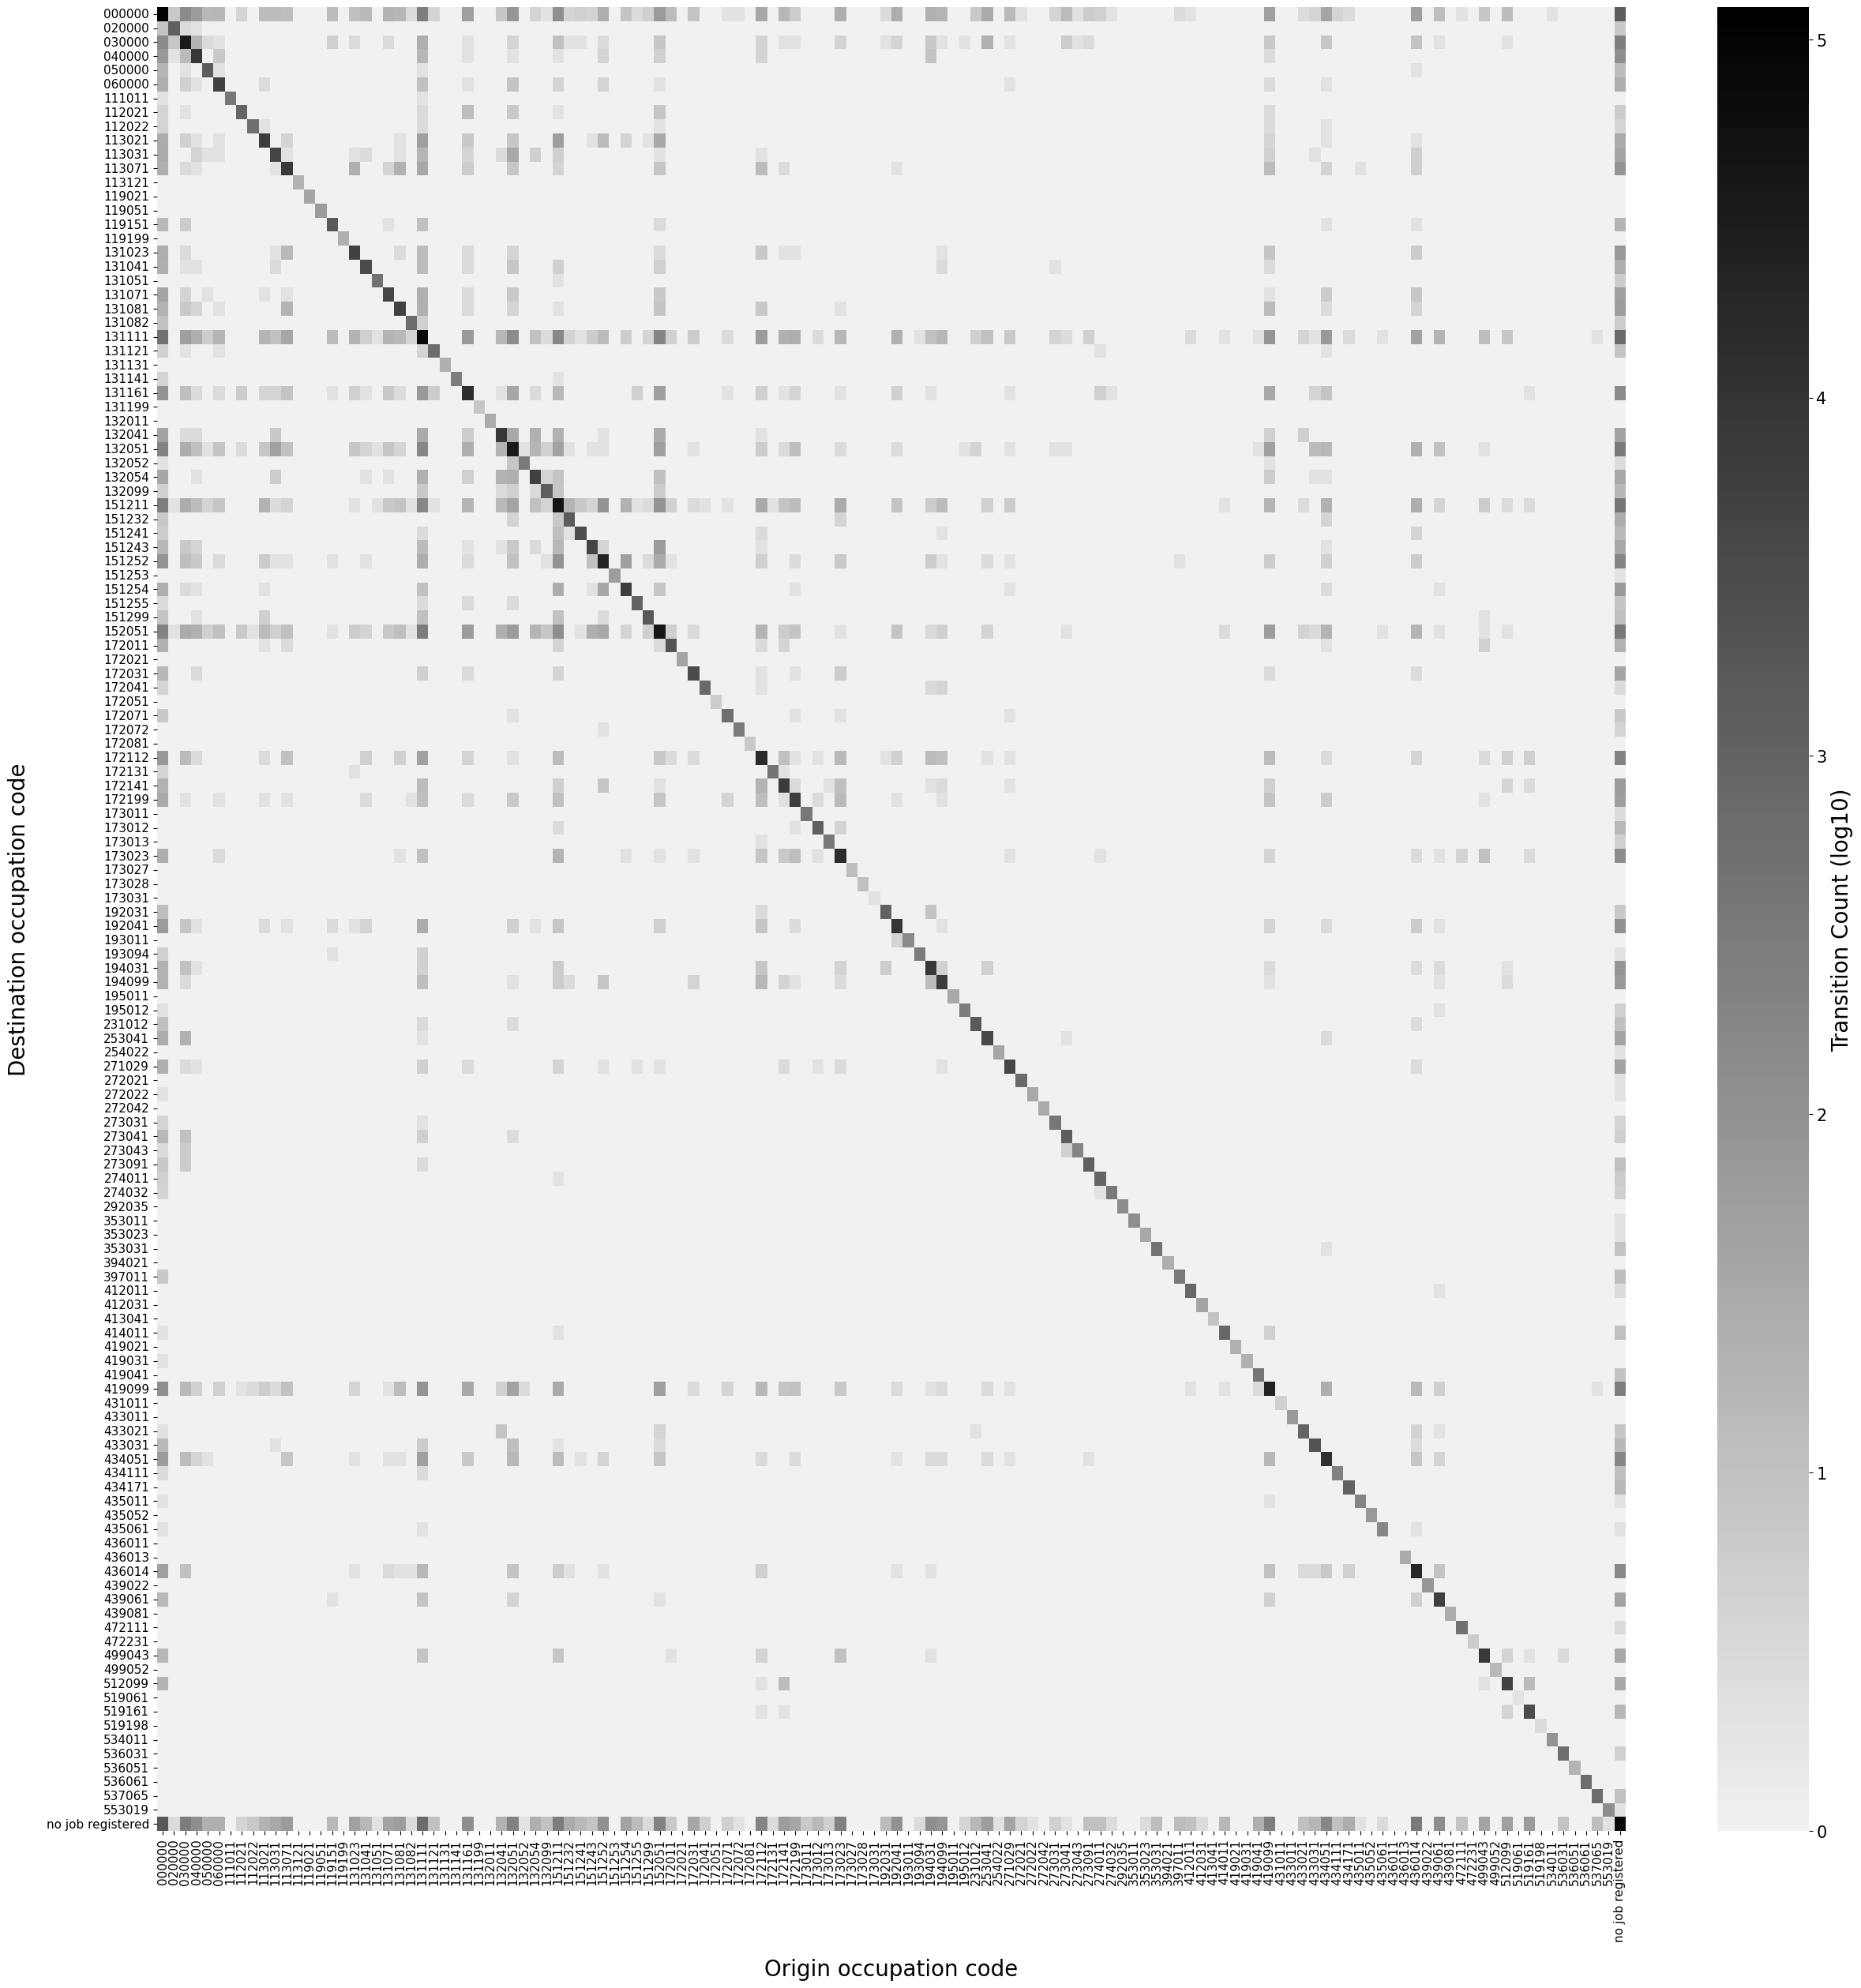

In [111]:
cmap = sns.color_palette("light:black", as_cmap=True)  # Inverts the grayscale
cmap.set_under('black')  # Set the under value color to black

plt.figure(figsize=(30, 30))
ax = sns.heatmap(jobs_transitions_relation_df, annot=False,
                 cbar_kws={'label': 'Transition Count (log10)'},
                 vmin=0,
                 cmap=cmap
                 )
# ax.set_title("Job Transition Matrix")
ax.set_xlabel("Origin occupation code", labelpad=15, fontsize=20)  # Increase label padding for x-axis
ax.set_ylabel("Destination occupation code", labelpad=15, fontsize=20)  # Increase label padding for y-axis
cbar = ax.collections[0].colorbar
cbar.set_label('Transition Count (log10)', size=20)  # Adjust fontsize as needed
cbar.ax.tick_params(labelsize=15)  # Adjust fontsize as needed
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.savefig('Job_Transition_Matrix_Full_Graph.pdf', bbox_inches='tight')
plt.show()

In [112]:
# Assuming jobs_transitions_relation_df contains log-scaled values
# and jobs_transitions_relation_df_copy contains original non-log values
data = jobs_transitions_relation_df
original_data = jobs_transitions_relation_df_copy.astype(str)  # Convert to string for hovertemplate compatibility

fig = px.imshow(data,
                labels=dict(x="Origin Occupation Code", y="Destination Occupation Code", color="Transition Count (log10)"),
                x=data.columns,
                y=data.index,
                aspect="auto",  # Maintain aspect ratio based on content
                )

# Customize the hovertemplate to show original data values
fig.update_traces(hovertemplate='Origin Occupation Code: %{y}<br>Destination Occupation Code: %{x}<br>Count: %{text}<extra></extra>',
                  text=original_data.values)  # Providing original data for hover text

fig.update_layout(
    xaxis_title="Origin Occupation Code",
    yaxis_title="Destination Occupation Code",
    title="Job Transition Matrix",
    title_x=0.5,  # Center title
    width=1080,  # Adjust size as needed
    height=1080,  # Adjust size as needed
    coloraxis_colorbar=dict(
        title="Transition Count (log10)",
    ),
)

# To save the plot as HTML file
fig.write_html("Job_Transition_Matrix_Interactive.html")

fig.show()

# Answering questions (from the filtered graph)

In [44]:
jobs_transitions_relation_df

,000000,030000,040000,131111,131161,132051,151211,151252,152051,419099,434051
000000,0,1,0,22,0,1,1,0,0,0,0
030000,1,0,0,0,0,0,0,0,0,0,0
040000,1,0,0,0,0,0,0,0,0,0,0
131111,47,0,0,0,1,5,3,0,8,1,1
131161,1,0,0,0,0,0,0,0,0,0,0
132051,6,0,0,7,0,0,0,0,0,1,0
151211,20,0,0,7,0,0,0,1,2,0,0
151252,0,0,0,0,0,0,1,0,0,0,0
152051,11,0,0,20,0,1,1,0,0,1,0
419099,3,0,0,0,0,0,0,0,0,0,0


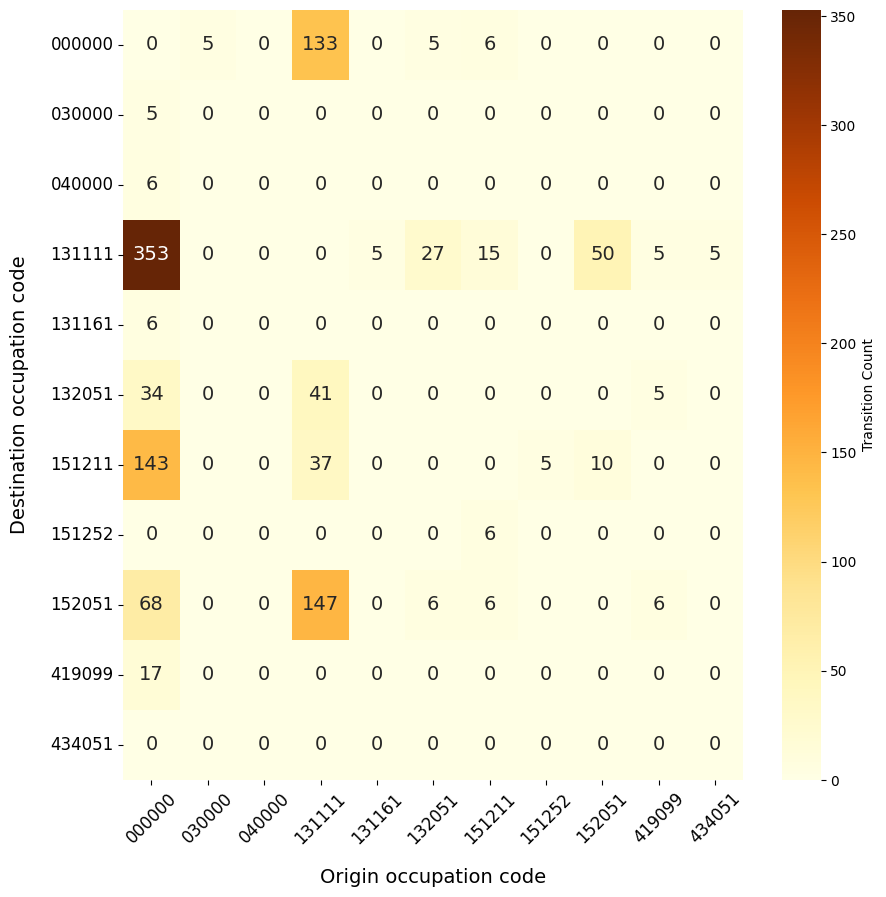

In [53]:
## Which jobs are closely related?
### In terms of number of people transitioning to/from
# Extract unique jobs from the nodes of filtered_graph
all_unique_jobs = {node_attrs['occupation'] for node, node_attrs in gf_filtered_temporal_single_experience_nodes_traceable.nodes(data=True)}

# Initialize the dictionary for job transitions
jobs_transitions_relation = {job: {other_job: 0 for other_job in all_unique_jobs} for job in all_unique_jobs}

def calculate_transitions(graph, jobs_transitions_relation):
    for node, node_attrs in graph.nodes(data=True):
        current_occupation = node_attrs['occupation']

        # For directed graphs, use successors; for undirected graphs, use neighbors
        neighbors = graph.successors(node) if isinstance(graph, nx.DiGraph) else graph.neighbors(node)

        for succ in neighbors:
            succ_attrs = graph.nodes[succ]
            succ_occupation = succ_attrs['occupation']
            
            weight = graph.get_edge_data(node, succ)[0]['weight']
            jobs_transitions_relation[current_occupation][succ_occupation] += weight

    return jobs_transitions_relation

# Calculate job transitions based on the filtered graph
jobs_transitions_relation = calculate_transitions(gf_filtered_temporal_single_experience_nodes_traceable, jobs_transitions_relation)

# Convert the transition relations dictionary to a DataFrame
jobs_transitions_relation_df = pd.DataFrame(jobs_transitions_relation).fillna(0).astype(int)
sorted_unique_jobs = sorted(all_unique_jobs)
jobs_transitions_relation_df = jobs_transitions_relation_df.reindex(index=sorted_unique_jobs, columns=sorted_unique_jobs)

mask = np.triu(np.ones_like(jobs_transitions_relation_df, dtype=bool))

plt.figure(figsize=(10, 10))
ax = sns.heatmap(jobs_transitions_relation_df, annot=True, fmt="d",
                 cmap="YlOrBr", 
                 cbar_kws={'label': 'Transition Count'},
                 annot_kws={'size': 14}  # Increase annotation text size
                 )
# ax.set_title("Job Transition Matrix")
ax.set_xlabel("Origin occupation code", labelpad=15, fontsize=14)  # Increase label padding for x-axis
ax.set_ylabel("Destination occupation code", labelpad=15, fontsize=14)  # Increase label padding for y-axis
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('job_transition_matrix_filtered_graph.pdf', bbox_inches='tight')
plt.show()

In [27]:
jobs_transitions_relation_df

,000000,030000,040000,131111,131161,132051,151211,151252,152051,419099,434051
000000,0,2,1,69,1,7,21,0,11,3,0
030000,2,0,0,0,0,0,0,0,0,0,0
040000,1,0,0,0,0,0,0,0,0,0,0
131111,69,0,0,0,1,12,10,0,28,1,1
131161,1,0,0,1,0,0,0,0,0,0,0
132051,7,0,0,12,0,0,0,0,1,1,0
151211,21,0,0,10,0,0,0,2,3,0,0
151252,0,0,0,0,0,0,2,0,0,0,0
152051,11,0,0,28,0,1,3,0,0,1,0
419099,3,0,0,1,0,1,0,0,1,0,0
